# Final Project of Group 5, Sy Lab

## Group members
Everyone in our group will build a simple and basic pipeline and based on this trying to find the best model in different part:
- Ke Ren : focus on embedding, besides the basic method in class, he will try to combine them together to see the performance.
- Minda Zhao: focus on new classifications such as LSTM and some optimizations to optimize our model.
- Minghao Zheng: focus on preprocessing and classifications such as RandomForest, XGboost and MLP

## Abstract

The proliferation of misleading information in everyday access media outlets such as social media feeds, news blogs, and online newspapers have made it challenging to identify trustworthy news sources, thus increasing the need for computational tools able to provide insights into the reliability of online content. In this project, we will build a model to identify the fake news.  
Generally, Word2Vec with XGBoost can work very well, but they have a very important shortage: they ignore the connection between paragraphs or don't represent it very well, so we use the Bi-LSTM network and Doc2Vec in our model trying to represent the connection better. Besides this, our group will use other embedding methods such as fasttext to overcome the disadvantage of word2vec and doc2vec. Finally, we will show the performance of different combination of methods by graphs and tables to give a best model. The final result is that the best model is __Doc2Vec+XGBoost__, the f1-score has reached __0.95__.  
Also, the given dataset is too small and balanced, so our group get another dataset to test our model from ISOT Lab online. (Contain 20000+ real news and 20000+ fake news)

## Flow Chart

![a](Outline\Fake News Detection.jpg)

## Dataset:

- fake_or_real_news.csv (too small and balanced)
- ISOT Fake News Dataset (Contain 20000+ real news and 20000+ fake news).   
From University of Victoria, ISOT Research Lab.  
URL : https://www.uvic.ca/engineering/ece/isot/datasets/

## Data Cleaning

### Delete samples contain missing values
If you have a brief look at the titlts and texts of the samples, you will find that some of these only contain some punctuations.

For example:

In [9]:
import pandas as pd
df = pd.read_csv('Original_News_Dataset/fake_or_real_news.csv')
df = df.astype({'title':'str', 'text':'str'})
print(df['title'][3456])
df = df[df['title'].str.len() >= 2]
df = df[df['text'].str.len() >= 2]

:


### Remove samples which are not written in English

In [10]:
from langdetect import detect_langs
df['language'] = df.apply(lambda x: detect_langs(x['title'])[0].lang, axis=1)
df = df[df['language']=='en']

### Use regular expression to remove some special information such as news agency and authors.

In [6]:
import pandas as pd
df_Fake = pd.read_csv('ISOT_News_Dataset/Fake.csv')
df_True = pd.read_csv('ISOT_News_Dataset/True.csv')
df_Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_True.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


The tables above are some rows of True_news and Fake_news of ISOT dataset. We can see that in True_news dataset the texts always contain the news agency but in the Fake_news dataset the news agency is absent. So we should remove these words because it can influence the ability of the model.

In [ ]:
def clean_True_text(tokenized_string, sw, punct):
    tokenized_string = re.sub(r'(.*) - ', '', tokenized_string)                  #regular expression
    tokenized_list = word_tokenize(tokenized_string)
    new_list = [token.lower() for token in tokenized_list if token.lower() not in chain(punct, sw)]
    str = ' '
    return str.join(new_list)

### Remove Stopwords and Punctuations, Lower-case, Stemming and Lemmatizing:  
Pay attention to the tag of the word, it can decide the result of Lemmatization. Here is the difference between using the tag of the word or not.

In [1]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
word = 'better'
print(lemmatizer.lemmatize(word))
print(lemmatizer.lemmatize(word, pos = 'a'))

better
good


But not all the embedding functions need to stem and lemmatize. For example, the performance of Doc2Vec with this preprocessing is worse than Doc2Vec without it, also in the Bi-LSTM network. The form below will show the difference.  

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-c3ow"></th>
    <th class="tg-c3ow">Logistic Regression</th>
    <th class="tg-c3ow">RandomForest</th>
    <th class="tg-c3ow">XGBoost</th>
    <th class="tg-c3ow">SVM</th>
    <th class="tg-c3ow">MLP</th>
  </tr>
  <tr>
    <td class="tg-c3ow">Doc2Vec with stemming and Lemmatizing</td>
    <td class="tg-c3ow">0.9340</td>
    <td class="tg-c3ow">0.9281</td>
    <td class="tg-c3ow">0.9307</td>
    <td class="tg-c3ow">0.9353</td>
    <td class="tg-c3ow">0.9373</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Doc2Vec without stemming and Lemmatizing</td>
    <td class="tg-c3ow">0.9444</td>
    <td class="tg-c3ow">0.9437</td>
    <td class="tg-c3ow">0.9523</td>
    <td class="tg-c3ow">0.9411</td>
    <td class="tg-c3ow">0.9437</td>
  </tr>
</table>

The reason of this phenomenon might be that Doc2Vec (also Fasttext and LSTM) focus on the sequence characteristic of the documents. If we use stemming and lemmatizing, it will destroy the sequence and the grammar of texts. So in the following part we use Doc2Vec without preprocessing.

### The code of data cleaning

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from itertools import chain
from langdetect import detect_langs

df = pd.read_csv('Original_News_Dataset/fake_or_real_news.csv')
df = df.astype({'title':'str', 'text':'str'})
df = df[df['title'].str.len() >= 2]
df = df[df['text'].str.len() >= 2]

sw = stopwords.words('english')
sw.extend(["'s", "''", "``"])
punct = punctuation + '’“”—`'
stemmer = PorterStemmer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    res = []
    lemmatizer = WordNetLemmatizer()
    for word, pos in nltk.pos_tag(sentence):
        wordnet_pos = get_wordnet_pos(pos) or wordnet.NOUN
        res.append(lemmatizer.lemmatize(word, pos = wordnet_pos))
    return res

def clean_text(tokenized_list, sw, punct):
    new_list = [token.lower() for token in tokenized_list if token.lower() not in chain(punct, sw)]
    new_list = lemmatize_sentence(new_list)
    new_list = [stemmer.stem(token) for token in new_list]
    str = ' '
    return str.join(new_list)


df['language'] = df.apply(lambda x: detect_langs(x['title'])[0].lang, axis=1)
df = df[df['language']=='en']
df['tokenized_title_list'] = df.apply(lambda x : clean_text(nltk.word_tokenize(x['title']), sw, punct), axis=1)
df['tokenized_text_list'] = df.apply(lambda x : clean_text(nltk.word_tokenize(x['text']), sw, punct), axis=1)

df.to_csv('Original_News_Dataset/Fake_or_real_news_cleaned(complete).csv', index = False)

## Main EDA Methods

### Load Clean Data

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from prettytable import PrettyTable
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import*
from collections import defaultdict
from operator import itemgetter
%matplotlib inline

# Custom the draw hist
def draw_hist(myList, Title, Xlabel, Ylabel, Xmin, Xmax, bins = 100):
    plt.hist(myList, bins)
    plt.xlabel(Xlabel)
    plt.xlim(Xmin, Xmax)
    plt.ylabel(Ylabel)
    plt.title(Title)
    plt.show()

print('Process : Read Data')

# Read cleaned data
df = pd.read_csv('Original_News_Dataset/Fake_or_real_news_cleaned(complete).csv')
df['label'] = df['label'].replace(['FAKE', 'REAL'], [1, 0])

# Transfor the string into tokenized list
tokenized_list = []
for i, title_element in enumerate(df['tokenized_title_list']):
    text = str(title_element) + ' ' + str(df['tokenized_text_list'][i])
    tokenized_list.append(str(text).split())

Process : Read Data


### Class Distribution
Draw the class distribution histogram to check if the class is balanced.

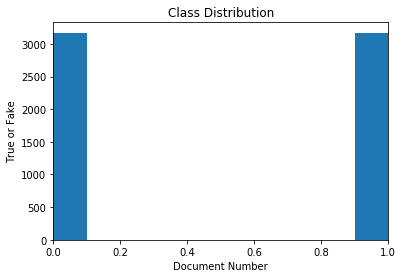

In [9]:
# Class Dist
draw_hist(df['label'], 'Class Distribution', 'Document Number', 'True or Fake', 0, 1, 10)

### Document Length
Draw the document length distribution histogram. To save the memory, we can cut some extremely long documents.

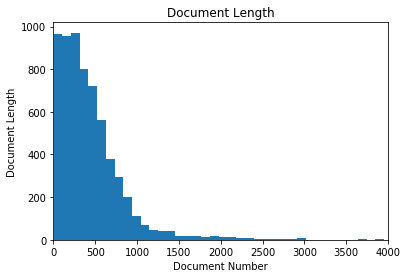

In [3]:
# Document Length
length_list = [len(word_list) for word_list in tokenized_list]
draw_hist(length_list, 'Document Length', 'Document Number', 'Document Length', 0, 4000)

### Common Words (With TFIDF)
Find common words in True news and common words in Fake news. According to these we can decide highly common words in both True news and Fake news, these words may not make sense in the classification

In [10]:
# Distinguish True and Fake list
label = df.label.isin(['0'])
True_list = []
Fake_list = []
for i, title, text in zip(label,df['tokenized_text_list'],df['tokenized_title_list']):
    textwhole = str(title) + ' ' + str(text)
    if i == False:
        Fake_list = Fake_list + list(str(textwhole).split())
    else:
        True_list = True_list + list(str(textwhole).split())

#### Important words in Ture News

<BarContainer object of 15 artists>

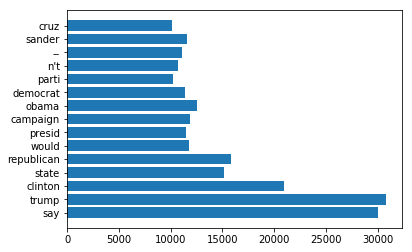

In [11]:
# Mutiply by the tfidf-value of each word
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
def fittfidf(tokenized_list):
    tfidf = TfidfVectorizer(analyzer=lambda x: x)
    tfidf.fit(tokenized_list)
    max_idf = max(tfidf.idf_)
    tfidfweight = defaultdict(
        lambda: max_idf,
        [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])
    return tfidfweight

tfidfweight = fittfidf(tokenized_list)

# True_table = PrettyTable(["Word", "Frequency"])
True_values_counts = Counter(True_list)
True_top_50 = True_values_counts.most_common(50)
True_word_list = []
True_Frequency_list = []
for word, Frequency in True_top_50:
    if Frequency*tfidfweight[word]>10000:
        True_word_list.append(word)
        True_Frequency_list.append(Frequency*tfidfweight[word])
#     True_table.add_row([word, Frequency])
plt.barh(True_word_list, True_Frequency_list)
# print(True_table)

#### important words in Fake News

<BarContainer object of 16 artists>

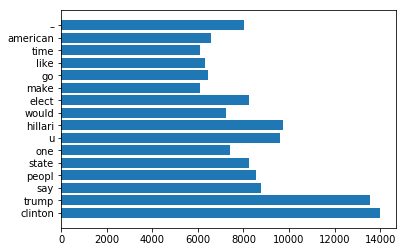

In [12]:
# Fake_table = PrettyTable(["Word", "Frequency"])
Fake_values_counts = Counter(Fake_list)
Fake_top_20 = Fake_values_counts.most_common(20)
Fake_word_list = []
Fake_Frequency_list = []
for word, Frequency in Fake_top_20:
    if Frequency*tfidfweight[word]>6000:
        Fake_word_list.append(word)
        Fake_Frequency_list.append(Frequency*tfidfweight[word])
#     Fake_table.add_row([word, Frequency])
plt.barh(Fake_word_list, Fake_Frequency_list)
# print(Fake_table)

## Text/Word Embedding

When we have the raw corpus, we want the machine to discriminate the news, but how can it be done with words. So we need to transform the words/documents into the vectors.
- One-hot Encoding
- Naive Doc2vec (Word2vec each word)
- Gensim (Doc2vec method with pre-trained model)
- Fasttext

Two ways to put title and text together:
- Take the title as the first sentence of the text, vectorize them together
- Vectorize title and text respectively, and put them into a bigger vector

## Data Transformation
If we use Doc2Vec, things become simple, we can just get the document vectors and put it into the classifier. But what should I do if I only get the list of word vectors? The following methods will transform the word vectors into the document vectors.

- __Raw Counts Sum Vector__  
Average of Word2Vec vectors : You can just take the average(or divided by L2-norm) of all the word vectors in a sentence. This average vector will represent your sentence vector.
- __TFIDF Sum Vector__  
Average of Word2Vec vectors with TF-IDF : Take the word vectors and multiply it with their TF-IDF scores. Just take the average(or divided by L2-norm) and it will represent your sentence vector.

How to evaluate the result of Text/Word Embedding：

  Generally, the more similar the distribution of the l2-norm of a document vectors with normal distribution(Gaussian distribution), the better the results are. The chart can give us an intuitionistic evaluation of the Doc2Vec and Word2Vec.

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


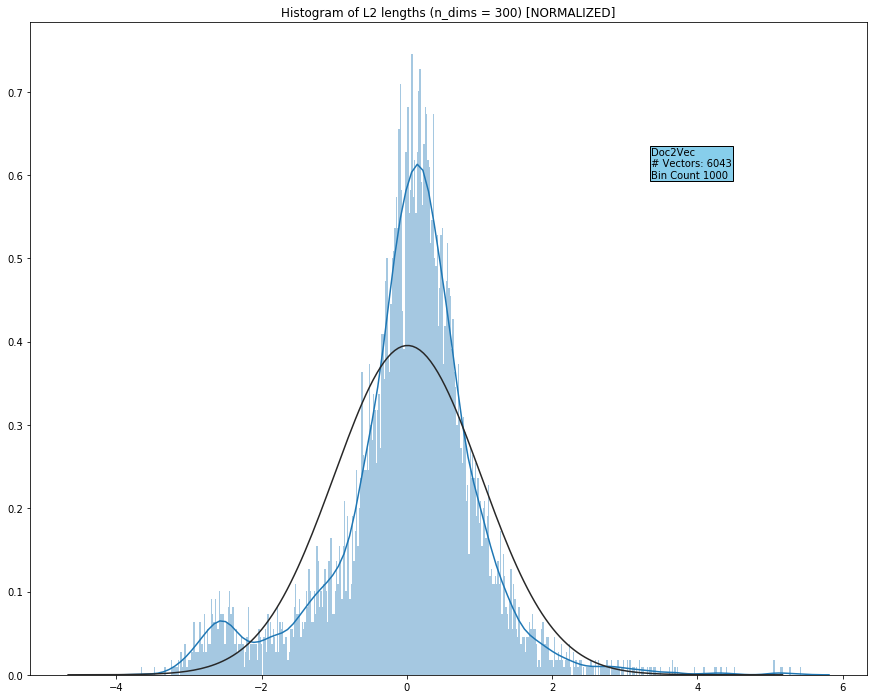

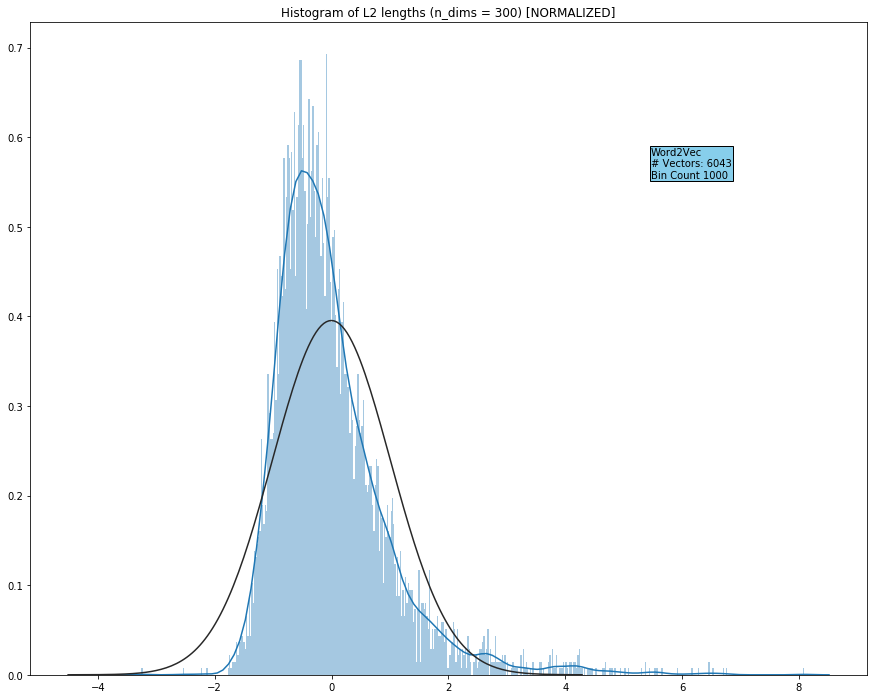

In [5]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

from gensim.models import Doc2Vec
from gensim.models import Word2Vec
from gensim.models.doc2vec import TaggedDocument

from scipy.stats import*
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import*
from collections import defaultdict
%matplotlib inline

def norm_EDA(vectors, name):
    l2_lengths = np.linalg.norm(vectors, axis = 1)
    l2_lengths_normed = (l2_lengths - l2_lengths.mean()) / l2_lengths.std()
    l2_lengths = l2_lengths_normed
    plt.subplots(figsize = (15, 12))
    ax = sns.distplot(l2_lengths, bins = 500)

    x = np.random.randn(10000)
    ax = sns.distplot(x, color = 'r', fit = norm, hist = False, kde = False, ax = ax)
    title = "Histogram of L2 lengths (n_dims = {n_dims})"
    title += " [NORMALIZED]"
    ax.set_title(title.format(n_dims = vectors[0].shape[0]))

    x_coord, y_coord = (.7, .7)
    anno_box = []
    anno_box.append("{}".format(name))
    anno_box.append("# Vectors: {}".format(len(vectors)))
    anno_box.append("Bin Count {}".format(str(1000)))
    bbox_props = dict(boxstyle = 'square,pad=0.1', fc = 'skyblue')
    ax.figure.text(x_coord, y_coord, s = '\n'.join(anno_box), bbox = bbox_props)

df = pd.read_csv('Original_News_Dataset/Fake_or_real_news_cleaned(basic).csv')
df['label'] = df['label'].replace(['FAKE', 'REAL'], [1, 0])
    
tokenized_list = []
corpus = []
for i, title_element in enumerate(df['tokenized_title_list']):
    text = str(title_element) + ' ' + str(df['tokenized_text_list'][i])
    tokenized_list.append(str(text).split())
    corpus.append(text)

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokenized_list)]
doc2vec_model = Doc2Vec(vector_size = 300, min_count = 5, dm = 0, epochs = 10, pretrained_emb = 'data/GoogleNews-vector-negative300.bin.gz')
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples = doc2vec_model.corpus_count, epochs = 10)
norm_EDA(doc2vec_model.docvecs.doctag_syn0, "Doc2Vec")

word2vec_model = Word2Vec(tokenized_list, min_count = 1, size = 300, sg = 0, alpha = 0.025, iter = 10, batch_words = 10000, window = 5)
tfidf_vec = TfidfVectorizer() 
tfidf_vec.fit(corpus)
max_idf = max(tfidf_vec.idf_)
word2weight = defaultdict(lambda : max_idf, [(w, tfidf_vec.idf_[i]) for w, i in tfidf_vec.vocabulary_.items()])
x = []
for text in tokenized_list:
    text_vector = np.zeros(300)
    for element in text:
        if element in word2weight:
            text_vector = text_vector + word2weight[element] * word2vec_model[element]
    text_vector = text_vector / len(text)
    # text_vector = text_vector / np.linalg.norm(text_vector, ord = 2)
    x.append(text_vector)
norm_EDA(x, "Word2Vec")

## Classification
Now we get the document vectors from the feature extractions and use them to train the classifier. The classifiers we used in this projects are presented as below.

- __Logistic Regression__  

In [ ]:
LRmodel = LogisticRegression()

- __RandomForest Classifier__  

In [ ]:
LRmodel = RandomForestClassifier()
param_dist = {"max_features" : ['auto', 'sqrt', 'log2'],
              "n_estimators" : [100, 200, 300],
              "criterion" : ['gini', 'entropy']}

- __Support Vector Machine__ 

In [ ]:
svc = SVC()
param_dist = {'C':[0.001,0.006,0.01,0.04,0.08,0.1],
              'kernel':('linear','rbf'), 
              'gamma':[0.001,0.005,0.1,0.15,0.20,0.23,0.27],
              'decision_function_shape':['ovo','ovr']}

 - __Multi-Layer Perceptron__

In [ ]:
mlp = MLPClassifier()
param_dist = {'hidden_layer_sizes':[(64,), (128,), (256,)],
              'activation':['identity', 'logistic', 'tanh', 'relu'], 
              'solver':['sgd', 'adam'],
              'learning_rate':['constant', 'invscaling', 'adaptive'],
              'learning_rate_init':[0.001, 0.01, 0.1]}

- __XGBoost Classifier__

In [ ]:
XGmodel = XGBClassifier(reg_lambda = 1, objective = "binary:logistic")
param_dist = {"max_depth" : sp_randint(3, 10),
              "learning_rate" : [0.0005, 0.001, 0.01, 0.1, 0.2, 0.3],
              "subsample" : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8], 
              "n_estimators" : sp_randint(100, 2000)}

- __Bi-LSTM Network__  

In [ ]:
def create_model(learn_rate = 0.01):
    model = Sequential()
    model.add(Bidirectional(LSTM(128, input_shape = (samples, 128, 300), return_sequences = True), merge_mode = 'concat'))
    model.add(Dropout(0.5))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

__But why we use LSTM-Network?__  
Texts always have complex time correlation, but traditional data transformation method can not represent these context characteristics, so we introduce Long Short Term Memory network to transfor the word embedding into text embedding. This method is sensitive to sequence so it can have a better proformance.  

__Here are two examples of sample combinations and their results (Doc2Vec + XGBoost and Word2Vec + LSTM + MLP)__

### Doc2Vec + XGBoost

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import*
from gensim.models import*
from gensim.models.doc2vec import*
from xgboost.sklearn import XGBClassifier
from sklearn.metrics.classification import*
from sklearn.model_selection import*
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
#--------------------------------------------------------------------------------------------------
# Read data
print('Process : Read Data')

df = pd.read_csv('Original_News_Dataset/Fake_or_real_news_cleaned(basic).csv')
df['label'] = df['label'].replace(['FAKE', 'REAL'], [1, 0])
tokenized_list = []
for i, element in enumerate(df['tokenized_title_list']):
    text = str(element) + ' ' + str(df['tokenized_text_list'][i])
    tokenized_list.append(text.split())

#--------------------------------------------------------------------------------------------------
print('Process : Doc2Vec')
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokenized_list)]
doc2vec_model = Doc2Vec(vector_size = 300, min_count = 5, dm = 0, epochs = 10)
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples = doc2vec_model.corpus_count, epochs = 10)

x = []
for text in tokenized_list:
  x.append(doc2vec_model.infer_vector(text))
x = np.array(x)
y = np.array(df['label'].values)

#--------------------------------------------------------------------------------------------------
# Train and test
print('Process : Train and Test')
#split the data into train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

XGmodel = XGBClassifier()
XGmodel.fit(x_train, y_train)
y_pred = XGmodel.predict(x_test)

target_names = ['REAL', 'FAKE']
print(classification_report(y_test, y_pred, target_names = target_names, digits = 4))
print(confusion_matrix(y_test, y_pred))

Process : Read Data
Process : Doc2Vec
Process : Train and Test
             precision    recall  f1-score   support

       REAL     0.9186    0.9039    0.9112       749
       FAKE     0.9070    0.9213    0.9141       762

avg / total     0.9127    0.9126    0.9126      1511

[[677  72]
 [ 60 702]]


### Word2Vec + LSTM + MLP

/home/blazer/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Process : Read Data
Process : Word2Vec


/home/blazer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:73: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Process : train and test
Train on 4078 samples, validate on 454 samples
Epoch 1/10
4078/4078 [==============================] - 4s 865us/step - loss: 0.6433 - acc: 0.6949 - val_loss: 0.4322 - val_acc: 0.8370
Epoch 2/10
4078/4078 [==============================] - 2s 576us/step - loss: 0.2672 - acc: 0.8950 - val_loss: 0.3510 - val_acc: 0.8326
Epoch 3/10
4078/4078 [==============================] - 2s 562us/step - loss: 0.1293 - acc: 0.9546 - val_loss: 0.4041 - val_acc: 0.8568
Epoch 4/10
4078/4078 [==============================] - 2s 560us/step - loss: 0.0392 - acc: 0.9919 - val_loss: 0.3672 - val_acc: 0.8722
Epoch 5/10
4078/4078 [==============================] - 2s 573us/step - loss: 0.0097 - acc: 0.9995 - val_loss: 0.4340 - val_acc: 0.8678
Epoch 6/10
4078/4078 [==============================] - 2s 570us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.4725 - val_acc: 0.8767
Epoch 7/10
4078/4078 [==============================] - 2s 560us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0

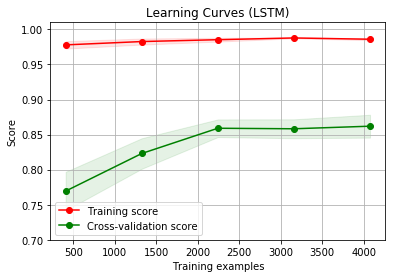

In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import*
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import*
from sklearn.metrics.classification import*
from sklearn.model_selection import*
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import*

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose = 0)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#--------------------------------------------------------------------------------------------------
# Read data
print('Process : Read Data')
df = pd.read_csv('Original_News_Dataset/Fake_or_real_news_cleaned(basic).csv')
df['label'] = df['label'].replace(['FAKE', 'REAL'], [1, 0])
tokenized_list = []
for i, title_element in enumerate(df['tokenized_title_list']):
    text = str(title_element) + ' ' + str(df['tokenized_text_list'][i])
    tokenized_list.append(str(text).split())

#--------------------------------------------------------------------------------------------------
# Word2Vec
print('Process : Word2Vec')
vec_size = 300
model = Word2Vec(tokenized_list, 
                 min_count = 1, 
                 size = vec_size, 
                 sg = 0, 
                 alpha = 0.025, 
                 iter = 10, 
                 batch_words = 10000, 
                 window = 5)
x = []
for tokenized_title in tokenized_list:
    vec_tokenized_title = []
    for element in tokenized_title:
        vec_tokenized_title.append(model[element])
    x.append(vec_tokenized_title)

x = np.array(x)
y = np.array(df['label'].values)
#--------------------------------------------------------------------------------------------------
# Train and test
print('Process : train and test')
length_list = [len(element) for element in x]
max_length = max(length_list)
max_length = min(max_length, 100)
samples = len(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

x_train = pad_sequences(x_train, maxlen = max_length, dtype = 'float32', padding = 'post', value = 0)
x_test = pad_sequences(x_test, maxlen = max_length, dtype = 'float32', padding = 'post', value = 0)

def create_model(learn_rate = 0.01):
    model = Sequential()
    model.add(Bidirectional(LSTM(128, input_shape = (samples, 128, 300), return_sequences = True), merge_mode = 'concat'))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

lstm_model = KerasClassifier(build_fn = create_model, verbose = 0, validation_split = 0.1, shuffle = True, epochs = 10, batch_size = 256)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(x_train, y_train, verbose = 1)

title = r"Learning Curves (LSTM)"
cv = ShuffleSplit(n_splits = 3, test_size = 0.1, random_state = 0)
plot_learning_curve(lstm_model, title, x_train, y_train, ylim = (0.7, 1.01), cv = cv, n_jobs = 1)

y_pred = lstm_model.predict(x_test)
target_names = ['REAL', 'FAKE']
print(classification_report(y_test, y_pred, target_names = target_names, digits = 4))
print(confusion_matrix(y_test, y_pred))
plt.show()

## Methods to Optimize Our Model
From the two examples we can see that just sample combination can not reach the best score and there are many problems such as overfitting in the LSTM network. So the following part will optimize our model and get a better result.

### Hypertuning
- __GridSearchCV & RandomizedSearchCV__  
  RandomizedSearchCV can be much more faster than GridSearchCV but it has a problem that it can performance even worse than doing nothing because most time the combination of parameters can not reappear as the combination of doing nothing or even worse.
- (Optional) Hyperopt, based on Bayesian Optimization

### Deal with Overfitting
- Train-Validation-Test Split
- Use K-Fold Cross Validation (Which is also used to solve Information Leakage). 
__Here is the graphic of these methods__

![a](Outline/K-fold and Train_valid_test.png)

- Dropout  
  Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks. The term "dropout" refers to dropping out units (both hidden and visible) in a neural network. In the training stages, the probability that a hidden node will be dropped is usually 0.5.  
- Regularization  
A regularization term (or regularizer) R(f) is added to a loss function:  
  In some classifier functions there is an option to use l1-norm regularization or l2-norm regularization

### Maxpooling layer
In the neural network. Because the document is too long, and the important information to classification only takes a small part, so we choose to use maxpooling to extract the most important part of the text.

In [ ]:
model.add(GlobalMaxPooling1D())    # In Keras

### Ensemble Learning (Model Stacking)
Traditionally, there are three methods of ensemble learning: __bagging__, __boosting__ and __stacking__. So why choose stacking?  
For __bagging__, every basic has the same weight for voting so the the worse classifier might influence the result a lot.  
For __boosting__, the model revises the weight of the samples according to the error of the last prediction, It has a better performance but can easily overfit.  
But for __stacking__, it can overcome these drawbacks.

![a](Outline/Model_Stacking.png)

In [ ]:
sclf = StackingCVClassifier(classifiers = [LogisticRegression(), RandomForestClassifier(), SVC(), MLPClassifier(), XGBClassifier()], 
                            meta_classifier = SGDClassifier())
params = {'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
          'randomforestclassifier__n_estimators': [10, 50],
          'svc__C':[0.001,0.006,0.01,0.04,0.08,0.1],
          'mlpclassifier__learning_rate_init':[0.001, 0.01, 0.1],
          'xgbclassifier__learning_rate' : [0.0005, 0.001, 0.01, 0.1],
          'meta-sgdclassifier__learning_rate' : ['constant', 'optimal', 'adaptive', 'invscaling'],
          'meta-sgdclassifier__eta0' : [0.001, 0.01, 0.1]
          }

### Deal with Imbalanced Classes
  - Do nothing. Sometimes you get lucky and nothing needs to be done. You can train on the so-called natural (or stratified) distribution and sometimes it works without need for modification.
  - Balance the training set in some way:
    - Oversample the minority class.
    - Undersample the majority class.
    - Synthesize new minority classes.
  - Throw away minority examples and switch to an anomaly detection framework.
  - At the algorithm level, or after it:
    - Adjust the class weight (misclassification costs).
    - Adjust the decision threshold.
    - Modify an existing algorithm to be more sensitive to rare classes.

__Here are three examples and results with optimization (Doc2Vec + XGBoost & Word2Vec + LSTM + MLP & Model_Stacking)__

### Doc2Vec + XGBoost (With RandomizedSearchCV + K-fold validation)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import*
from gensim.models import*
from gensim.models.doc2vec import*
from xgboost.sklearn import XGBClassifier
from sklearn.metrics.classification import*
from sklearn.model_selection import*
from scipy.stats import randint as sp_randint
from operator import itemgetter
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
#--------------------------------------------------------------------------------------------------
# Read data
print('Process : Read Data')

df = pd.read_csv('Original_News_Dataset/Fake_or_real_news_cleaned(basic).csv')
df['label'] = df['label'].replace(['FAKE', 'REAL'], [1, 0])
tokenized_list = []
for i, element in enumerate(df['tokenized_title_list']):
    text = str(element) + ' ' + str(df['tokenized_text_list'][i])
    tokenized_list.append(text.split())

#--------------------------------------------------------------------------------------------------
# doc2vec in gensim
print('Process : Doc2Vec')
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokenized_list)]
doc2vec_model = Doc2Vec(vector_size = 300, min_count = 5, dm = 0, epochs = 10, pretrained_emb = 'data/GoogleNews-vector-negative300.bin.gz')
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples = doc2vec_model.corpus_count, epochs = 10)

x = []
for text in tokenized_list:
  x.append(doc2vec_model.infer_vector(text))
x = np.array(x)
y = np.array(df['label'].values)

#--------------------------------------------------------------------------------------------------
# Train and test
print('Process : Train and Test')
#split the data into train data and test data
SSS = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, train_size = 0.75, random_state = 0)
for train_index, test_index in SSS.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
param_dist = {"max_depth" : sp_randint(3, 10),
              "learning_rate" : [0.0005, 0.001, 0.01, 0.1, 0.2, 0.3],
              "subsample" : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8], 
              "n_estimators" : sp_randint(100, 2000)
              }

XGmodel = XGBClassifier(reg_lambda = 1, objective = "binary:logistic")

n_iter_search = 20
random_search = RandomizedSearchCV(XGmodel, param_distributions = param_dist, n_iter = n_iter_search, return_train_score = True, verbose = 1)
random_search.fit(x_train, y_train)

grid_scores = sorted(random_search.grid_scores_, key = itemgetter(1), reverse = True)
print("Model with rank: {0}".format(1))
print("Mean validation score: {0:.3f}".format(grid_scores[0].mean_validation_score))
print("Parameters: {0}".format(grid_scores[0].parameters))
validation_scores = map(lambda x : str(x), grid_scores[0].cv_validation_scores)
print("Scores For Each Fold: {0}".format('  '.join(validation_scores)))
print("")

y_pred = random_search.predict(x_test)
target_names = ['REAL', 'FAKE']
print(classification_report(y_test, y_pred, target_names = target_names, digits = 4))
print(confusion_matrix(y_test, y_pred))

Process : Read Data
Process : Doc2Vec
Process : Train and Test
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 33.3min finished


Model with rank: 1
Mean validation score: 0.943
Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1836, 'subsample': 0.8}
Scores For Each Fold: 0.9358465608465608  0.9370860927152318  0.9556291390728476

             precision    recall  f1-score   support

       REAL     0.9389    0.9525    0.9456       758
       FAKE     0.9515    0.9376    0.9445       753

avg / total     0.9452    0.9451    0.9451      1511

[[722  36]
 [ 47 706]]


### Word2Vec + LSTM + MLP (With Dropout + Maxpooling + Train_Validation_Test Split)

Process : Read Data
Process : Word2Vec


/home/blazer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:73: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Process : train and test
Train on 4078 samples, validate on 454 samples
Epoch 1/10
4078/4078 [==============================] - 28s 7ms/step - loss: 0.8317 - acc: 0.5770 - val_loss: 0.5907 - val_acc: 0.8414
Epoch 2/10
4078/4078 [==============================] - 26s 6ms/step - loss: 0.5355 - acc: 0.7308 - val_loss: 0.4471 - val_acc: 0.9075
Epoch 3/10
4078/4078 [==============================] - 26s 6ms/step - loss: 0.3655 - acc: 0.8418 - val_loss: 0.2902 - val_acc: 0.9317
Epoch 4/10
4078/4078 [==============================] - 26s 6ms/step - loss: 0.2649 - acc: 0.8936 - val_loss: 0.2257 - val_acc: 0.9339
Epoch 5/10
4078/4078 [==============================] - 26s 6ms/step - loss: 0.2064 - acc: 0.9193 - val_loss: 0.1875 - val_acc: 0.9604
Epoch 6/10
4078/4078 [==============================] - 26s 6ms/step - loss: 0.1904 - acc: 0.9296 - val_loss: 0.1741 - val_acc: 0.9559
Epoch 7/10
4078/4078 [==============================] - 26s 6ms/step - loss: 0.1712 - acc: 0.9348 - val_loss: 0.1751 -

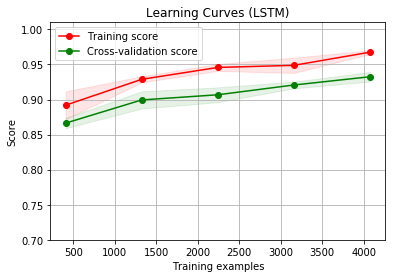

In [2]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import*
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import*
from sklearn.metrics.classification import*
from sklearn.model_selection import*
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import*

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose = 0)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#--------------------------------------------------------------------------------------------------
# Read data
print('Process : Read Data')
df = pd.read_csv('Original_News_Dataset/Fake_or_real_news_cleaned(basic).csv')
df['label'] = df['label'].replace(['FAKE', 'REAL'], [1, 0])
tokenized_list = []
for i, title_element in enumerate(df['tokenized_title_list']):
    text = str(title_element) + ' ' + str(df['tokenized_text_list'][i])
    tokenized_list.append(str(text).split())

#--------------------------------------------------------------------------------------------------
# Word2Vec
print('Process : Word2Vec')
vec_size = 300
model = Word2Vec(tokenized_list, 
                 min_count = 1, 
                 size = vec_size, 
                 sg = 0, 
                 alpha = 0.025, 
                 iter = 10, 
                 batch_words = 10000, 
                 window = 5)
x = []
for tokenized_title in tokenized_list:
    vec_tokenized_title = []
    for element in tokenized_title:
        vec_tokenized_title.append(model[element])
    x.append(vec_tokenized_title)

x = np.array(x)
y = np.array(df['label'].values)
#--------------------------------------------------------------------------------------------------
# Train and test
print('Process : train and test')
length_list = [len(element) for element in x]
max_length = max(length_list)
max_length = min(max_length, 1000)
samples = len(y)

SSS = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, train_size = 0.75, random_state = 0)
for train_index, test_index in SSS.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

x_train = pad_sequences(x_train, maxlen = max_length, dtype = 'float32', padding = 'post', value = 0)
x_test = pad_sequences(x_test, maxlen = max_length, dtype = 'float32', padding = 'post', value = 0)

def create_model(learn_rate = 0.01):
    model = Sequential()
    model.add(Bidirectional(LSTM(128, input_shape = (samples, 128, 300), return_sequences = True), merge_mode = 'concat'))
    model.add(Dropout(0.5))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

lstm_model = KerasClassifier(build_fn = create_model, verbose = 0, validation_split = 0.1, shuffle = True, epochs = 10, batch_size = 256)
lstm_model.fit(x_train, y_train, verbose = 1) 

title = r"Learning Curves (LSTM)"
cv = ShuffleSplit(n_splits = 3, test_size = 0.1, random_state = 0)
plot_learning_curve(lstm_model, title, x_train, y_train, ylim = (0.7, 1.01), cv = cv, n_jobs = 1)

y_pred = lstm_model.predict(x_test)
target_names = ['REAL', 'FAKE']
print(classification_report(y_test, y_pred, target_names = target_names, digits = 4))
print(confusion_matrix(y_test, y_pred))
plt.show()

### Doc2Vec + Model Stacking (With RandomizedSearchCV + K-fold validation)

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import*
from sklearn.linear_model import*
from sklearn.ensemble import*
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import*
from gensim.models import*
from gensim.models.doc2vec import*
from sklearn.metrics.classification import*
from sklearn.model_selection import*
from scipy.stats import randint as sp_randint
from operator import itemgetter
from vecstack import StackingTransformer
from mlxtend.classifier import StackingCVClassifier
warnings.filterwarnings(module = 'sklearn*', action = 'ignore', category = DeprecationWarning)
#--------------------------------------------------------------------------------------------------
# Read data

print('Process : Read Data')

df = pd.read_csv('Original_News_Dataset/Fake_or_real_news_cleaned(basic).csv')
df['label'] = df['label'].replace(['FAKE', 'REAL'], [1, 0])
tokenized_list = []
for i, element in enumerate(df['tokenized_title_list']):
    text = str(element) + ' ' + str(df['tokenized_text_list'][i])
    tokenized_list.append(text.split())

#--------------------------------------------------------------------------------------------------
# doc2vec in gensim

print('Process : Doc2Vec')
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokenized_list)]
doc2vec_model = Doc2Vec(vector_size = 300, min_count = 5, dm = 0, epochs = 10, pretrained_emb = 'data/GoogleNews-vector-negative300.bin.gz')
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples = doc2vec_model.corpus_count, epochs = 10)

x = []
for text in tokenized_list:
	x.append(doc2vec_model.infer_vector(text))
x = np.array(x)
y = np.array(df['label'].values)

#--------------------------------------------------------------------------------------------------
# Train and test
print('Process : Train and Test')
#split the data into train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 34)

sclf = StackingCVClassifier(classifiers = [LogisticRegression(), RandomForestClassifier(), SVC(), MLPClassifier(), XGBClassifier()], 
                            meta_classifier = SGDClassifier(max_iter = 1000, tol = 1e-3))
params = {'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
          'randomforestclassifier__n_estimators': [10, 50],
          'svc__C':[0.001,0.006,0.01,0.04,0.08,0.1],
          'mlpclassifier__learning_rate_init':[0.001, 0.01, 0.1],
          'xgbclassifier__learning_rate' : [0.0005, 0.001, 0.01, 0.1],
          'meta-sgdclassifier__learning_rate' : ['constant', 'optimal', 'invscaling'],
          'meta-sgdclassifier__eta0' : [0.001, 0.01, 0.1]
          }

grid = RandomizedSearchCV(estimator = sclf, param_distributions = params, cv = 5,refit = True)

grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)
target_names = ['REAL', 'FAKE']
print(classification_report(y_test, y_pred, target_names = target_names, digits = 4))
print(confusion_matrix(y_test, y_pred))

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Process : Read Data
Process : Doc2Vec
Process : Train and Test
             precision    recall  f1-score   support

       REAL     0.9426    0.9399    0.9413       716
       FAKE     0.9463    0.9487    0.9475       799

avg / total     0.9445    0.9446    0.9446      1515

[[673  43]
 [ 41 758]]


## Performance
In the following part our group will show the performance of different combination of embeddings, data transformations and classifications based on f1-score. Because 3D chart is not suitable for exhibitions, we will divide it into several parts based on embeddings.

### One-Hot
After the experiment. We find that the result of one-hot can take a lot of memory (9.4G) and PCA may lose some useful information of the texts, so we give up this method.

### Doc2Vec
| Classification | Logistic | RandomForest | XGBoost |   SVM  |   MLP  | Model_Stacking |
|:--------------:|:--------:|:------------:|:-------:|:------:|:------:|:------:|
|    F1-Score    |  0.9444  |    0.9437    |  __0.9523__ | 0.9411 | 0.9437 | 0.9446 |

### Word2Vec
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-c3ow"></th>
    <th class="tg-c3ow">Logistic</th>
    <th class="tg-c3ow">RandomForest</th>
    <th class="tg-c3ow">XGBoost</th>
    <th class="tg-c3ow">SVM</th>
    <th class="tg-c3ow">MLP</th>
    <th class="tg-c3ow">Bi-LSTM</th>
  </tr>
  <tr>
    <td class="tg-c3ow">SUM</td>
    <td class="tg-c3ow">0.8871<br></td>
    <td class="tg-c3ow">0.9049</td>
    <td class="tg-7btt">0.9142</td>
    <td class="tg-c3ow">0.8706</td>
    <th class="tg-c3ow">0.9168</th>
    <th class="tg-7btt" rowspan="2"><br>0.9444</th>
  </tr>
  <tr>
    <td class="tg-c3ow">TFIDF</td>
    <td class="tg-c3ow">0.9162</td>
    <td class="tg-c3ow">0.9102</td>
    <th class="tg-c3ow">0.9274</th>
    <td class="tg-c3ow">0.9116</td>
    <td class="tg-7btt">0.9241</td>
  </tr>
</table>

### Fasttext
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-c3ow"></th>
    <th class="tg-c3ow">Logistic</th>
    <th class="tg-c3ow">RandomForest</th>
    <th class="tg-c3ow">XGBoost</th>
    <th class="tg-c3ow">SVM</th>
    <th class="tg-c3ow">MLP</th>
    <th class="tg-c3ow">Bi-LSTM</th>
  </tr>
  <tr>
    <td class="tg-c3ow">SUM</td>
    <td class="tg-c3ow">0.9043<br></td>
    <td class="tg-c3ow">0.9010</td>
    <td class="tg-c3ow">0.9162</td>
    <td class="tg-c3ow">0.9043</td>
    <th class="tg-c3ow">0.9168</th>
    <td class="tg-7btt" rowspan="2"><br>0.9087</td>
  </tr>
  <tr>
    <td class="tg-c3ow">TFIDF</td>
    <td class="tg-c3ow">0.9168</td>
    <td class="tg-c3ow">0.9201</td>
    <th class="tg-c3ow">0.9320</th>
    <td class="tg-c3ow">0.9115</td>
    <td class="tg-c3ow">0.9274</td>
  </tr>
</table>

# Performance on Another Dataset

According to the chart above, we choose the model wtih best performance to deal with the new, big dataset to test its generalization ability. So here is the code and the performance (Doc2Vec + XGBoost).

In [1]:
import pandas as pd
import numpy as np
import itertools
import string
import nltk
import re

from nltk.corpus import stopwords
from string import punctuation
from itertools import*
from nltk import*
#----------------------------------------------------------------------------------------------------------------------------------------------------
# Function and Define
def clean_text(tokenized_list, sw, punct):
    new_list = [token.lower() for token in tokenized_list if token.lower() not in chain(punct, sw)]
    str = ' '
    return str.join(new_list)

def clean_True_text(tokenized_string, sw, punct):
    tokenized_string = re.sub(r'(.*) - ', '', tokenized_string)
    tokenized_list = word_tokenize(tokenized_string)
    new_list = [token.lower() for token in tokenized_list if token.lower() not in chain(punct, sw)]
    str = ' '
    return str.join(new_list)

#----------------------------------------------------------------------------------------------------------------------------------------------------
# Read Data
sw = stopwords.words('english')
punct = punctuation

df_Fake = pd.read_csv('ISOT_News_Dataset/Fake.csv')
df_True = pd.read_csv('ISOT_News_Dataset/True.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.width',300)
pd.set_option('display.max_colwidth',100)

df_True['tokenized_title_list'] = df_True.apply(lambda x : clean_text(word_tokenize(x['title']), sw, punct), axis=1)
df_True['tokenized_text_list'] = df_True.apply(lambda x : clean_True_text(x['text'], sw, punct), axis=1)
df_Fake['tokenized_title_list'] = df_Fake.apply(lambda x : clean_text(word_tokenize(x['title']), sw, punct), axis=1)
df_Fake['tokenized_text_list'] = df_Fake.apply(lambda x : clean_text(word_tokenize(x['text']), sw, punct), axis=1)

df_True.to_csv('ISOT_News_Dataset/True_cleaned(basic).csv', index = False)
df_Fake.to_csv('ISOT_News_Dataset/Fake_cleaned(basic).csv', index = False)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import*
from gensim.models import*
from gensim.models.doc2vec import*
from xgboost.sklearn import XGBClassifier
from sklearn.metrics.classification import*
from sklearn.model_selection import*
from scipy.stats import randint as sp_randint
from operator import itemgetter
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

#----------------------------------------------------------------------------------------------------------------------------------------------------
# Read data
print('Process : Read Data')

df_True = pd.read_csv('ISOT_News_Dataset/True_cleaned(basic).csv')
df_Fake = pd.read_csv('ISOT_News_Dataset/Fake_cleaned(basic).csv')

tokenized_list = []

for i, True_title_element in enumerate(df_True['tokenized_title_list']):
    text = str(True_title_element) + ' ' + str(df_True['tokenized_text_list'][i])
    tokenized_list.append(str(text).split())

for i, Fake_title_element in enumerate(df_Fake['tokenized_title_list']):
    text = str(Fake_title_element) + ' ' + str(df_Fake['tokenized_text_list'][i])
    tokenized_list.append(str(text).split())

True_sample = len(df_True)
Fake_sample = len(df_Fake)

#----------------------------------------------------------------------------------------------------------------------------------------------------
# doc2vec in gensim
print('Process : Doc2Vec')
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokenized_list)]
doc2vec_model = Doc2Vec(vector_size = 300, min_count = 5, dm = 0, epochs = 10, pretrained_emb = 'data/GoogleNews-vector-negative300.bin.gz')
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples = doc2vec_model.corpus_count, epochs = 10)

x = []
for text in tokenized_list:
    x.append(doc2vec_model.infer_vector(text))
x = np.array(x)
y = np.array(([1] * True_sample) + ([0] * Fake_sample))

#----------------------------------------------------------------------------------------------------------------------------------------------------
# Train and test
print('Process : Train and Test')
#split the data into train data and test data
SSS = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, train_size = 0.75, random_state = 66)
for train_index, test_index in SSS.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
param_dist = {"max_depth" : sp_randint(3, 10),
              "learning_rate" : [0.0005, 0.001, 0.01, 0.1, 0.2, 0.3],
              "subsample" : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8], 
              "n_estimators" : sp_randint(100, 2000)
              }

XGmodel = XGBClassifier(reg_lambda = 1, objective = "binary:logistic")

n_iter_search = 20
random_search = RandomizedSearchCV(XGmodel, param_distributions = param_dist, n_iter = n_iter_search, return_train_score = True, verbose = 1)
random_search.fit(x_train, y_train)

grid_scores = sorted(random_search.grid_scores_, key = itemgetter(1), reverse = True)
print("Model with rank: {0}".format(1))
print("Mean validation score: {0:.3f}".format(grid_scores[0].mean_validation_score))
print("Parameters: {0}".format(grid_scores[0].parameters))
validation_scores = map(lambda x : str(x), grid_scores[0].cv_validation_scores)
print("Scores For Each Fold: {0}".format('  '.join(validation_scores)))
print("")

y_pred = random_search.predict(x_test)
target_names = ['REAL', 'FAKE']
print(classification_report(y_test, y_pred, target_names = target_names, digits = 4))
print(confusion_matrix(y_test, y_pred))

Process : Read Data
Process : Doc2Vec
Process : Train and Test
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 439.9min finished


Model with rank: 1
Mean validation score: 0.983
Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 791, 'subsample': 0.4}
Scores For Each Fold: 0.9823608017817372  0.9852102637205987  0.9828047042052744

             precision    recall  f1-score   support

       REAL     0.9853    0.9848    0.9851      5871
       FAKE     0.9834    0.9839    0.9837      5354

avg / total     0.9844    0.9844    0.9844     11225

[[5782   89]
 [  86 5268]]
